In [1]:
import numpy as np
import pandas as pd

data = {
    'ID': np.arange(1, 1000001),  # 1 million IDs
    'Value': np.random.rand(1000000),  # 1 million random values
    'Category': np.random.choice(['A', 'B', 'C', 'D'], size=1000000)  # Random categories
}



In [2]:
df = pd.DataFrame(data)
print(df.head(10))

   ID     Value Category
0   1  0.346427        C
1   2  0.569241        B
2   3  0.230813        A
3   4  0.721483        D
4   5  0.459664        D
5   6  0.683019        A
6   7  0.900568        A
7   8  0.105538        D
8   9  0.267638        A
9  10  0.998708        A


In [5]:
df.Value

,Value
0,0.346427
1,0.569241
2,0.230813
3,0.721483
4,0.459664
...,...
999995,0.991033
999996,0.573841
999997,0.592866
999998,0.417885


In [6]:
df.rename(columns={
    'ID': 'ID number',
    'Value': 'Random value',
    'Category': 'Choice'
}, inplace=True)

print(df.head(5))


   ID number  Random value Choice
0          1      0.346427      C
1          2      0.569241      B
2          3      0.230813      A
3          4      0.721483      D
4          5      0.459664      D


In [8]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

student_data = pd.DataFrame({
    'school_code': ['s001', 's002', 's003', 's001', 's002', 's004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes',
             'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_Of_Birth': ['15/05/2002', '17/05/2002', '16/02/1999',
                      '25/09/1998', '11/05/2002', '15/09/1997'],
    'age': [12, 13, 14, 12, 13, 14],
    'height': [173, 192, 186, 167, 151, 159],
    'weight': [35, 32, 33, 30, 31, 32],
    'address': ['street1', 'street2', 'street3', 'street1', 'street2', 'street4']
}, index=['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])

print("Original DataFrame:")
print(student_data)

print('\nSplit the said data on school_code, class wise:')
result = student_data.groupby(['school_code', 'class'])

for name, group in result:
    print("\nGroup:", name)
    print(group)


Original DataFrame:
   school_code class            name date_Of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   
S2        s002     V    Gino Mcneill    17/05/2002   13     192      32   
S3        s003    VI     Ryan Parkes    16/02/1999   14     186      33   
S4        s001    VI    Eesha Hinton    25/09/1998   12     167      30   
S5        s002     V    Gino Mcneill    11/05/2002   13     151      31   
S6        s004    VI    David Parkes    15/09/1997   14     159      32   

    address  
S1  street1  
S2  street2  
S3  street3  
S4  street1  
S5  street2  
S6  street4  

Split the said data on school_code, class wise:

Group: ('s001', 'V')
   school_code class            name date_Of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   

    address  
S1  street1  

Group: ('s001', 'VI')
   school_code class          name date_Of_Birth  age  height  weight  address
S4  

In [20]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (4).csv


In [21]:
print(df.describe())


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [22]:
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [23]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [26]:
aggregated = df[['Pulse', 'Maxpulse']].agg(['min', 'max', 'count', 'mean'])
print(aggregated)


            Pulse    Maxpulse
min     80.000000  100.000000
max    159.000000  184.000000
count  169.000000  169.000000
mean   107.461538  134.047337


In [28]:
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df)


     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [29]:
filtered_df = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df)


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [31]:
df_modified = df.drop('Maxpulse', axis=1)
print(df_modified)


     Duration  Pulse     Calories
0          60    110   409.100000
1          60    117   479.000000
2          60    103   340.000000
3          45    109   282.400000
4          45    117   406.000000
5          60    102   300.000000
6          60    110   374.000000
7          45    104   253.300000
8          30    109   195.100000
9          60     98   269.000000
10         60    103   329.300000
11         60    100   250.700000
12         60    106   345.300000
13         60    104   379.300000
14         60     98   275.000000
15         60     98   215.200000
16         60    100   300.000000
17         45     90   375.790244
18         60    103   323.000000
19         45     97   243.000000
20         60    108   364.200000
21         45    100   282.000000
22         60    130   300.000000
23         45    105   246.000000
24         60    102   334.500000
25         60    100   250.000000
26         60     92   241.000000
27         60    103   375.790244
28         60 

In [41]:
print(df.columns)

Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [37]:
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)



Duration    int64
Pulse       int64
Calories    int64
dtype: object


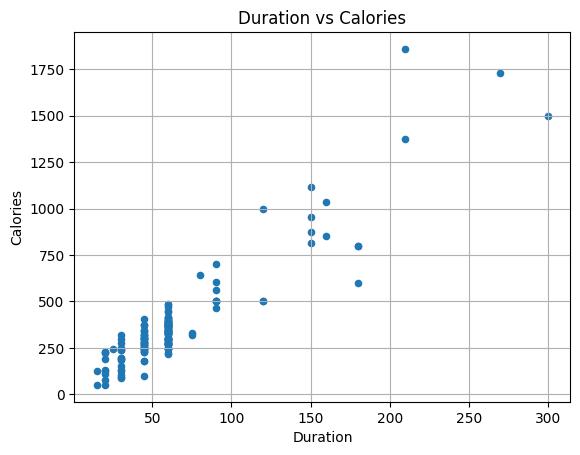

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot using Pandas plot() wrapper
df.plot(kind='scatter', x='Duration', y='Calories', title='Duration vs Calories', grid=True)

plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()
